   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


     sepal_length  sepal_width  petal_length
0             5.1          3.5           1.4
1             4.9          3.0           1.4
2             4.7          3.2           1.3
3             4.6          3.1           1.5
4             5.0          3.6           1.4
..            ...          ...           ...
145           6.7          3.0           5.2
146           6.3          2.5           5.0
147           6.5          3.0           5.2
148           6.2          3.4           5.4
149           5.9          3.0           5.1

[150 rows x 3 columns]


0         setosa
1         setosa
2         seto

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


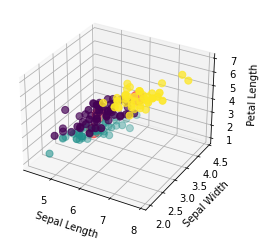

In [26]:
#Question 1(Clustering Without Scaling and Transformation)
#check dataset for true class (name or species)
#We shall use the iris.csv dataset. Clustering (k = 3) will be based on 3 features, sepal width, sepal length, and petal length.
#Correct and Good Example of K-Means Clustering using the iris dataset (3 features)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans

#Load dataset
data = pd.read_csv('iris.txt')
print(data.head())
print("\n")

#Select columns for X
X = data[['sepal_length', 'sepal_width', 'petal_length']]
true_class = data['species']
print(X)
print("\n")
print(true_class)
print("\n")

#Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments, 
#ignoring permutations and with chance normalization
print("Adjusted Rand Index is", metrics.adjusted_rand_score(true_class, cluster_class))

#Prediction of cluster
input = [[6.1, 3.0, 0.8]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)

#Plot the graphs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['sepal_length'], X['sepal_width'], X['petal_length'], c=cluster_class, s=50, cmap='viridis')

#plot the centers (3D)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5);

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

# How to improve:
# - Remove feature(s) or add more feature(s) or combine both and see the change in the performance of model
# - Data preprocessing: scaling and normalising before building the model because the predictors have different scale
# - Hyperparameter tuning: Try different values for parameters such as the number of clusters, distance metrics, etc.


  card  reports       age  income     share  expenditure owner selfemp  \
0  yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1  yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2  yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3  yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4  yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


Accuracy for 70% training set and 30% test set : 0.9823232323232324


Confusion matrix
[[ 80   1]
 [  6 309]]


true negative:  80
false negative:  6
true positive:  309
false positive:  1


Classification report:
              precision    recall  f1-score   support

          no       0

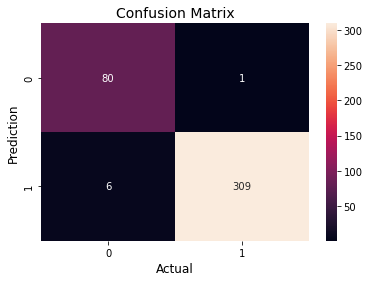

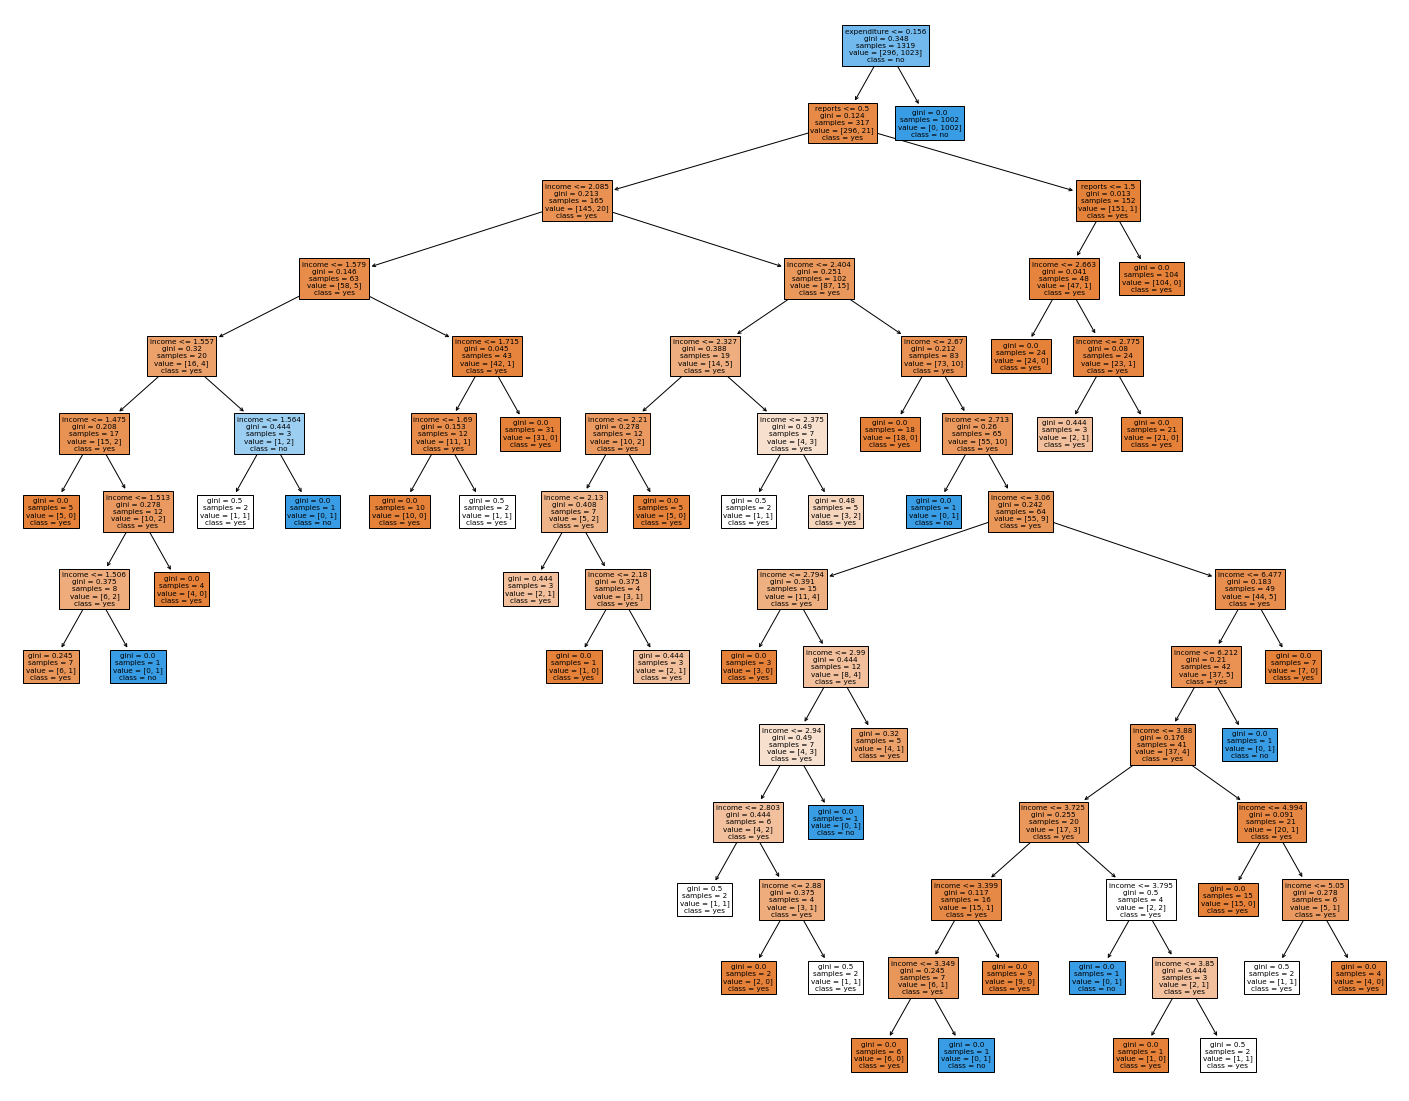

In [4]:
#Question2 DECISION TREE CLASSIFIER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dataset = pd.read_excel('DT_creditcard.xlsx')
print(dataset.head())

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['reports', 'income','expenditure']
X = dataset[feature_cols] # Features
Y = dataset['card'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Create Decision Tree classifer object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Evaluate the accuracy of the model (or classifier) for prediction
#Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred))


#How to improve the accuracy of the model? By tuning the number of features for the model
#Confusion matrix
print("\n")
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print("\n")

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

print("true negative: ", tn) #Interpretation: You predicted negative and it’s true.
print("false negative: ", fn) #You predicted negative and it’s false (Type 2 Error)
print("true positive: ", tp) #Interpretation: You predicted positive and it’s true.
print("false positive: ", fp) #Interpretation: You predicted positive and it’s false (Type 1 error)

#Classification report
print('\n')
print('Classification report:')
print(classification_report(y_test, y_pred))
print("\n")

sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Prepare the data data
dataset = pd.read_excel('DT_creditcard.xlsx')
X = dataset[feature_cols]
y = dataset['card']

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)

fig = plt.figure(figsize=(25, 20))
plot_tree(clf, 
          feature_names=feature_cols,  # Use the correct feature columns
          class_names=dataset['card'].unique().astype(str),
          filled=True)
plt.show()


In [ ]:
#This DECISION TREE MODEL is 98% accurate

   Region  Country  State     City  Month  Day  Year  AvgTemperature  \
0  Africa  Algeria    NaN  Algiers      1    1  1995            64.2   
1  Africa  Algeria    NaN  Algiers      1    2  1995            49.4   
2  Africa  Algeria    NaN  Algiers      1    3  1995            48.8   
3  Africa  Algeria    NaN  Algiers      1    4  1995            46.4   
4  Africa  Algeria    NaN  Algiers      1    5  1995            47.9   

        Date  
0 1995-01-01  
1 1995-01-02  
2 1995-01-03  
3 1995-01-04  
4 1995-01-05  


   Region  Country  State     City  Month  Day  Year  AvgTemperature  \
0  Africa  Algeria    NaN  Algiers      1    1  1995            64.2   
1  Africa  Algeria    NaN  Algiers      1    2  1995            49.4   
2  Africa  Algeria    NaN  Algiers      1    3  1995            48.8   
3  Africa  Algeria    NaN  Algiers      1    4  1995            46.4   
4  Africa  Algeria    NaN  Algiers      1    5  1995            47.9   

        Date  
0 1995-01-01  
1 1995-01-02

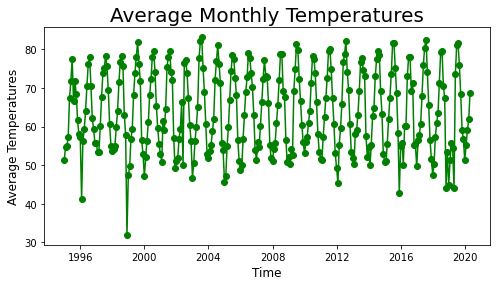

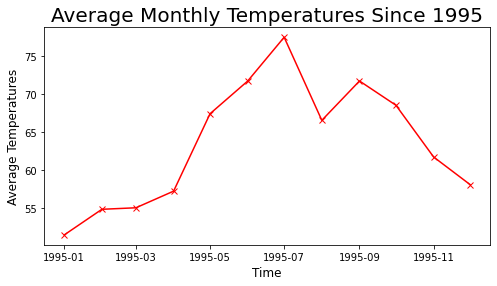

<Figure size 1440x1440 with 0 Axes>

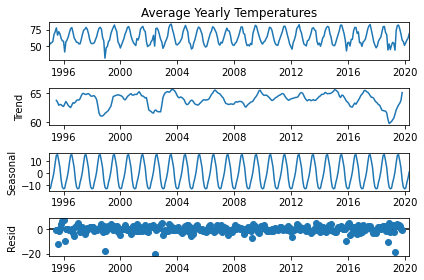

In [5]:
#QUESTION3 Time Series Analysis SEASONALITY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta
# Read the Excel file
dataset = pd.read_excel('small_city_temp.xlsx')

# Convert 'Date' column to datetime type
dataset['Date'] = pd.to_datetime(dataset['Date'])

print(dataset.head())
print("\n")

# Filter data for the specified city (Choose city Algiers)
city = dataset[dataset['City'] == 'Algiers']
print(city.head())
print("\n")

# Find the start and end date for temperature
print('The earliest and latest temperature dates are: ')
print(city['Date'].min(), city['Date'].max())
print("\n")

#Check whether there is any missing data for City
print(city.isnull().sum())
print("\n")

#Index Time Series Data, Date
city = city.set_index('Date')
print(city.index)
print("\n")

#Obtain the average temperatures for each month (MS)
month_average_temp = city['AvgTemperature'].resample('MS').mean()

# Set the display option to show all rows
# pd.set_option('display.max_rows', None)

#1995 city temperatures onwards
print("Average Temperature from 1995 onwards", month_average_temp['1995':])
print("\n")

# Reset the display option to its default value (if needed)
# pd.reset_option('display.max_rows')


#Plot the Average temperature Time Series Data for all the years
plt.figure(figsize=(8,4))
plt.plot(month_average_temp, color='green', marker='o')
plt.title("Average Monthly Temperatures", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Temperatures", fontsize = 12)
plt.show()
 
#Plot the Average temperature Time Series for only 1995
plt.figure(figsize=(8,4))
plt.plot(month_average_temp['1995'], color='red', marker='x')
plt.title("Average Monthly Temperatures Since 1995", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Temperatures", fontsize = 12)
plt.show()

#Plot the Average temperature Time Series Data for all the years
plt.figure(figsize=(20,20))
decomposition = sm.tsa.seasonal_decompose(month_average_temp, model='additive')
fig = decomposition.plot()
fig.get_axes()[0].set_title("Average Yearly Temperatures", fontsize=12)
plt.show()

In [ ]:
# Interpretation for 4 graphs
# - First one: the raw time series data. It shows the overall pattern
# - Trend graph: represents the long-term underlying direction or pattern. In this case, it shows the horizontal trend over the time.
# - Seasonal: the data has yearly seasonality. It can be seen that the pattern repeats after every one year.
# - Residuals: The residuals scatter consistently around 0.
# -> residuals capture the random fluctuations or irregularities in the data that are not explained by the underlying trend or seasonal patterns

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


      BMI      BP   S1     S2    S3   S4      S5   S6
321  31.2  117.67  229  138.8  29.0  7.9  5.7236  106
223  24.2   76.00  147   77.0  53.0  3.0  4.4427   79
306  26.2  101.00  161   99.6  48.0  3.0  4.2047   88
173  19.0   93.00  137   73.0  47.0  3.0  4.4427   78
193  25.9   76.00  240  169.0  39.0  6.0  5.0752   96
..    ...     ...  ...    ...   ...  ...     ...  ...
144  30.7   90.00  204  147.8  34.0  6.0  4.7095   93
12   23.7   92.00  186  109.2  62.0  3.0  4.3041   81
290  33.5  102.00  190  126.2  35.0  5.0  4.9698  102
365  22.8   91.00  196  118.8  48.0  4.0  4.9836  115
78   21.0   88

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


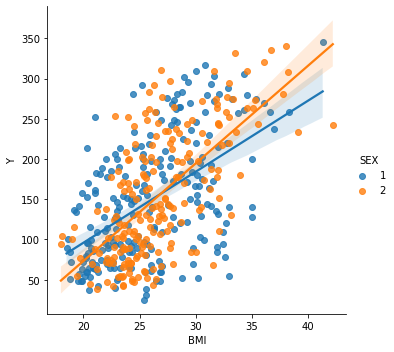

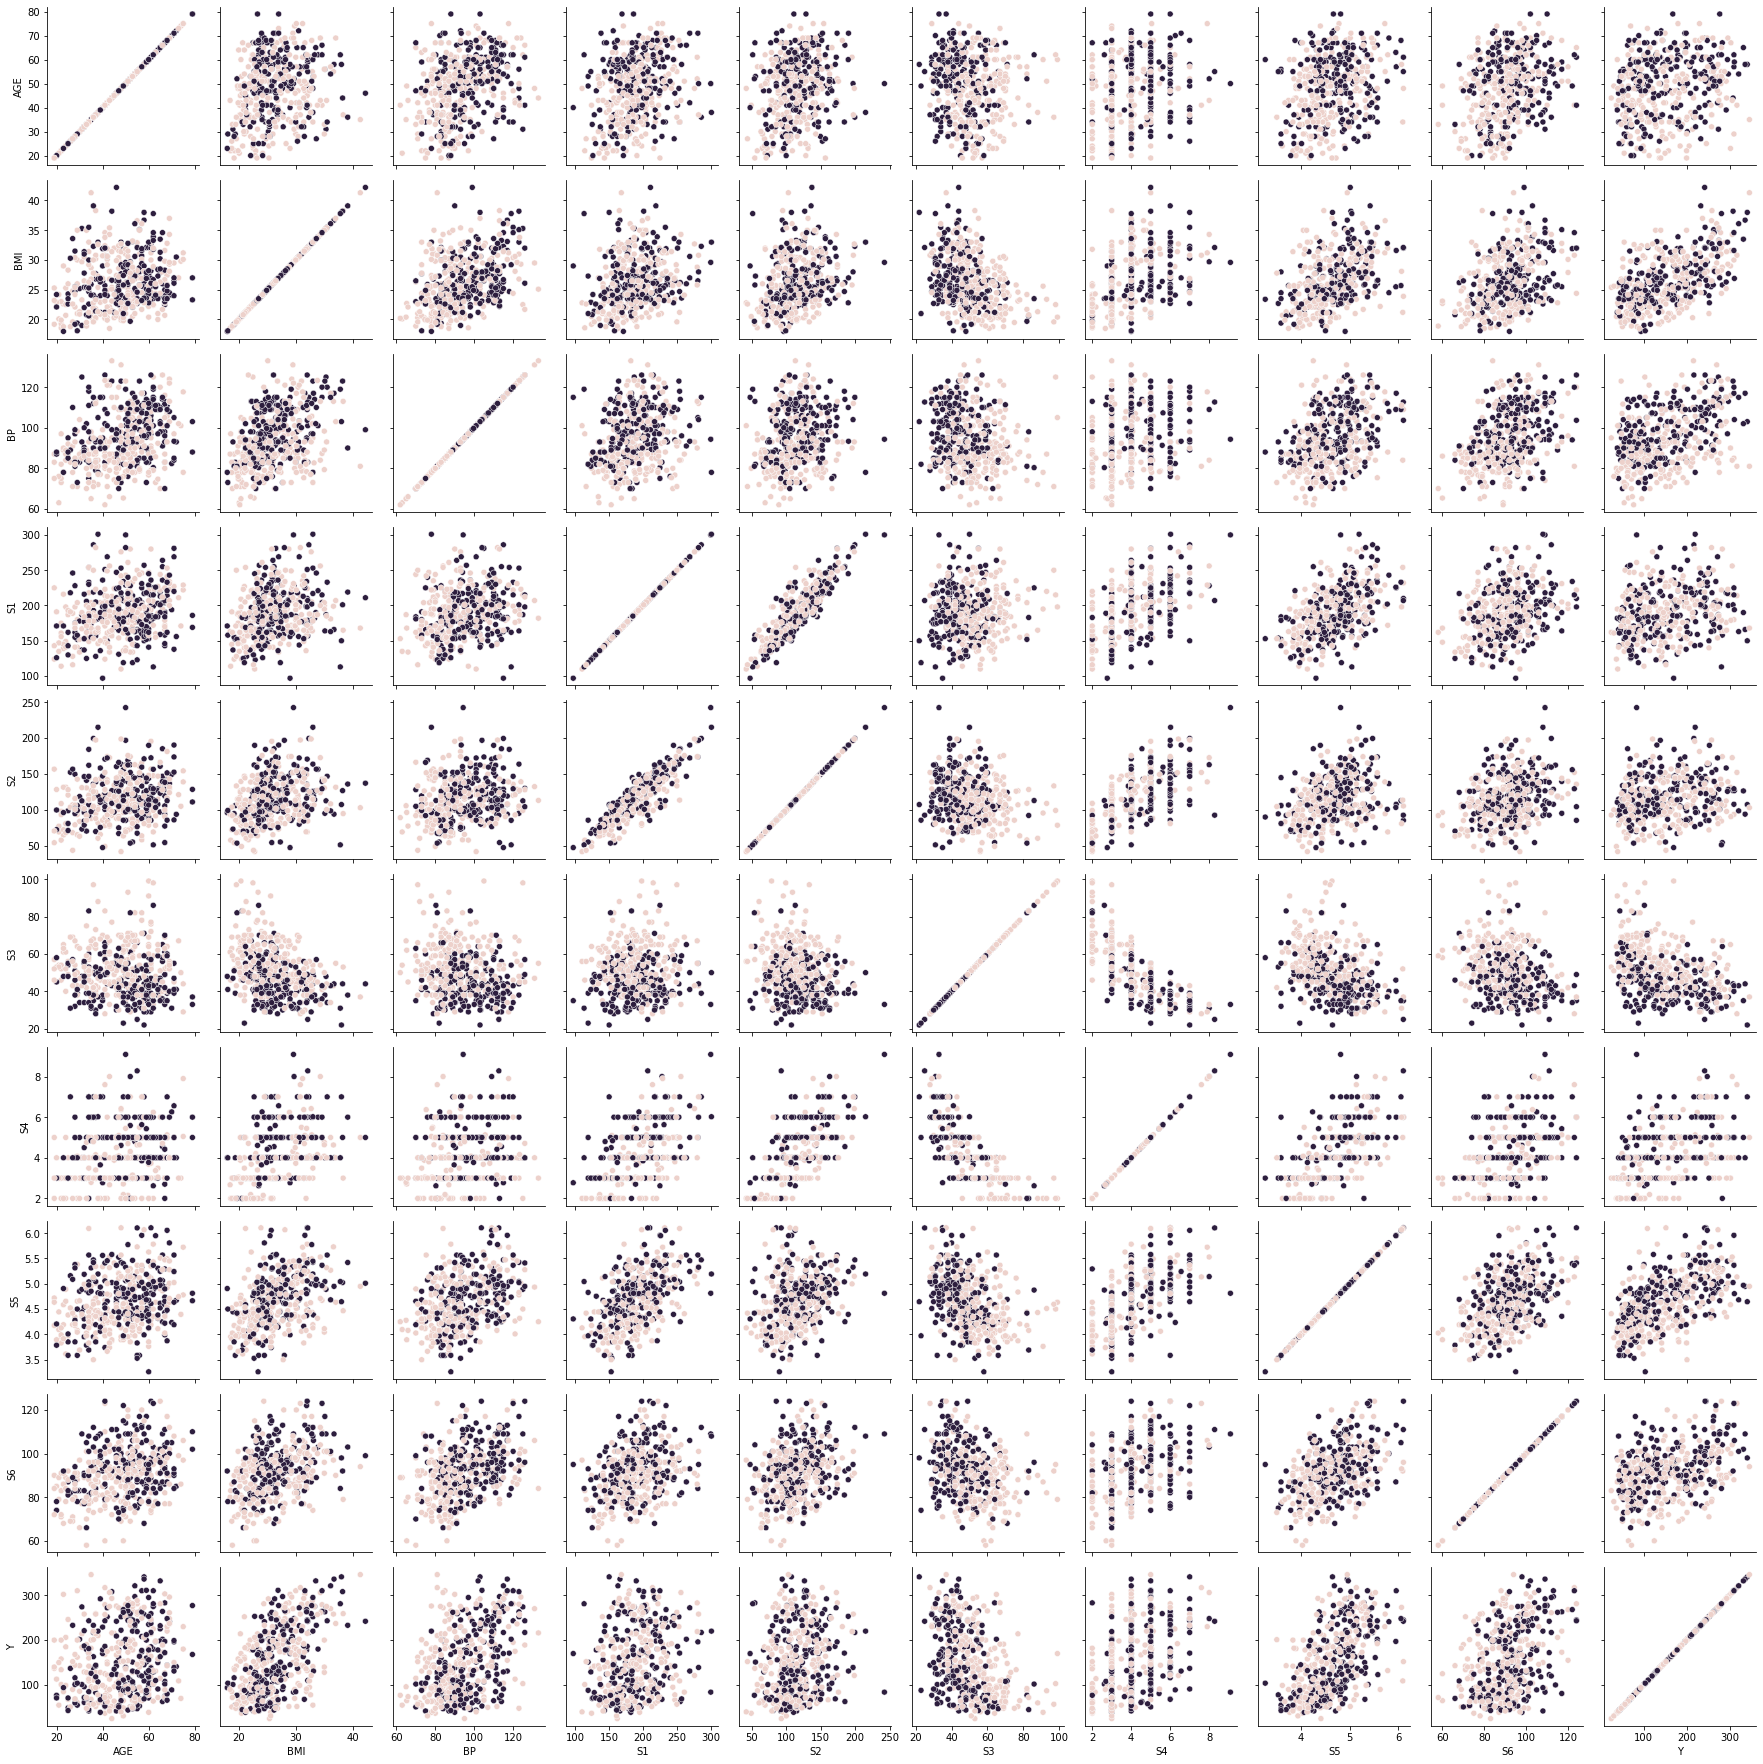

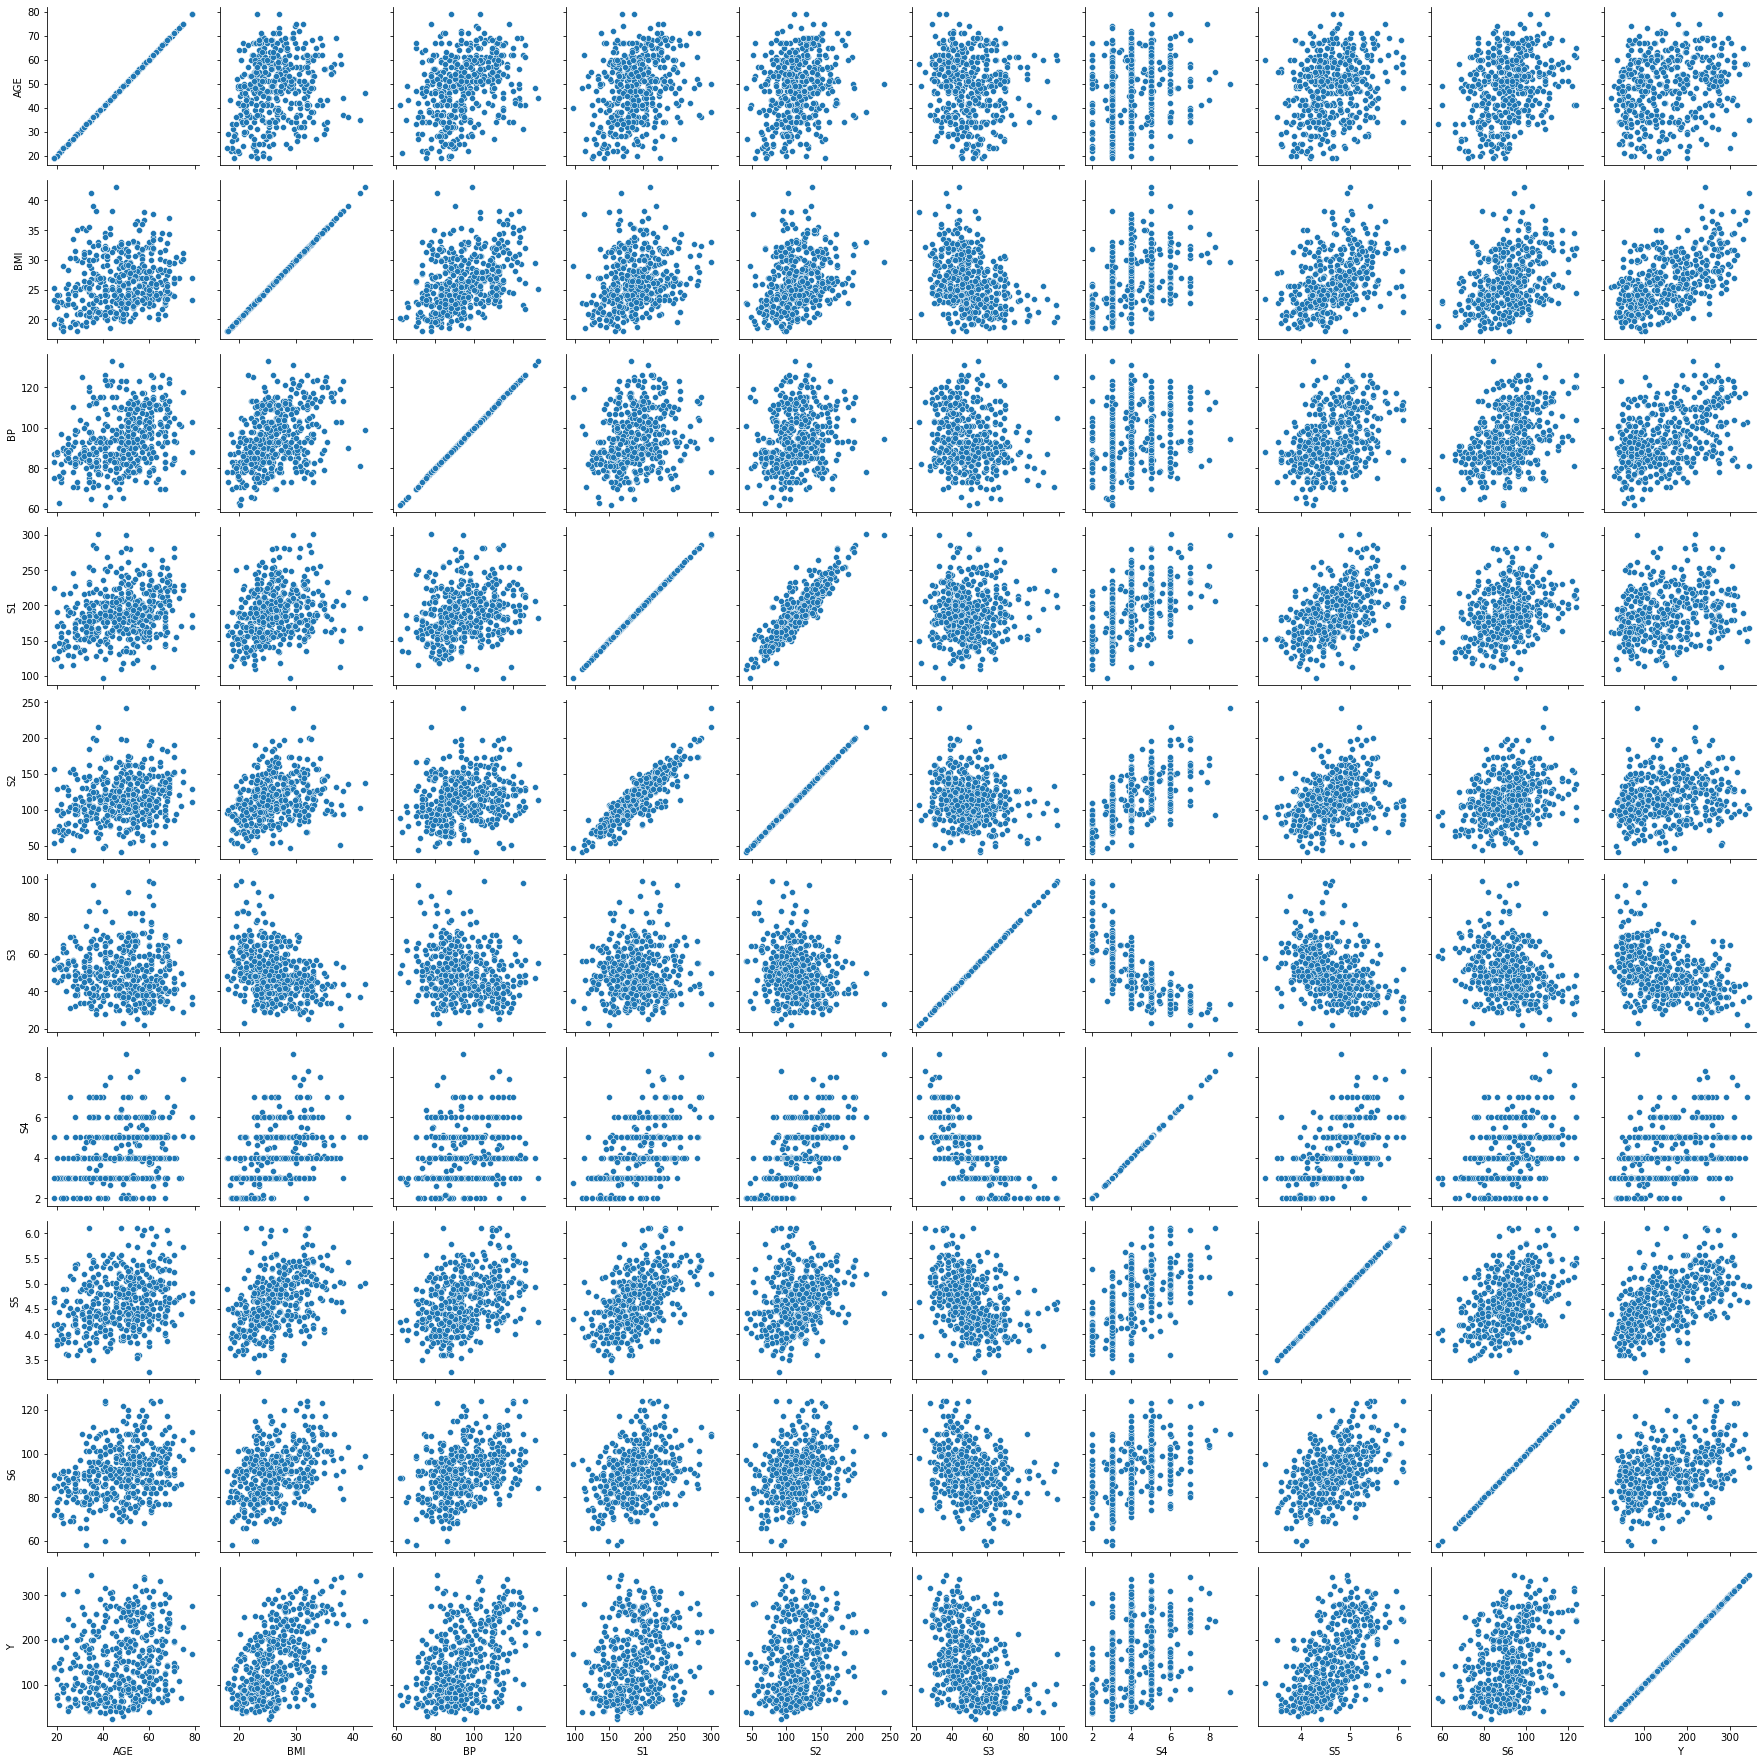

In [5]:
#Question4 MULTILINEAR REGRESSION
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
#load dataset and remove white spaces
dataset = pd.read_csv('diabetes.txt', delimiter="\s+")
print(dataset.head())
print("\n")
 
#Use only 1 feature - AGE to predict the target Y
diabetes_x = dataset[['BMI', 'BP' , 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
diabetes_y = dataset[['Y']]
 
#Split the dataset into training and testing sets (70%:30%)
x_train,x_test,y_train,y_test=train_test_split(diabetes_x, diabetes_y,test_size=0.3)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)
 
#Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets 
regr.fit(x_train, y_train)
 
# Make predictions using the testing set
y_pred = regr.predict(x_test)
 
#Make prediction for the following:
pBMI = 30
pBP = 100
pS1 = 160
pS2 = 55
pS3 = 45
pS4 = 4.0
pS5 = 4.5
pS6 = 88
print("\n")
print ('Predicted Y value: ', regr.predict([[pBMI, pBP, pS1, pS2, pS3, pS4, pS5, pS6]]))
print("\n")
 
#The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
 
#Use statsmodel for model summary
diabetes_x = sm.add_constant(diabetes_x)
model = sm.OLS(diabetes_y, diabetes_x).fit()
predictions = model.predict(diabetes_x)
print_model = model.summary()
print(print_model)


sns.set_style()
# Load the dataset
dataset = pd.read_csv('diabetes.txt', delimiter="\s+")
dataset2 = dataset.drop(columns=['SEX'])
print(dataset.head())
 
# Plot BMI and Y by Sex
g = sns.lmplot(
    data=dataset,
    x="BMI", y="Y", hue="SEX",
    height=5
)
 
# Use more informative axis labels than are provided by default
g.set_axis_labels("BMI", "Y")
 
#Pairwise plot by SEX
g = sns.PairGrid(dataset, hue = "SEX")
g.map(sns.scatterplot)
 
#Pairwise plot
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot)


irises classes are:  ['setosa' 'versicolor' 'virginica']
The predict y value is that is the iris type  [1]


The predict y value is that is the iris type  [2]


Confusion Matrix is 
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Confusion matrix, without normalization
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.90909091 0.09090909]
 [0.         0.         1.        ]]


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


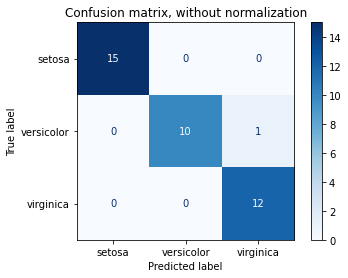

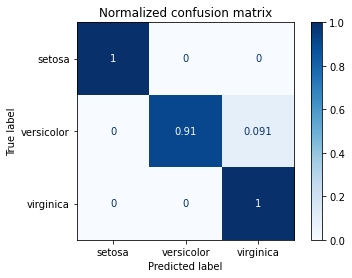

In [17]:
#QUESTION5 NN-CONFUSION MATRIX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Load dataset and explore dataset
irises = datasets.load_iris()
X = irises.data
y = irises.target
class_names = irises.target_names
print("irises classes are: ", class_names)


#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
classifier = mlp.fit(X_train,y_train)

#Prediction 
y_pred = mlp.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[5, 3.2, 1.2, 0.4]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the iris type ", new_y)
print("\n")

new_input2 = [[7.8, 2.5, 6.5, 1.9]]
new_y2 = mlp.predict(new_input2)
print("The predict y value is that is the iris type ", new_y2)
print("\n")


#Model Evaluation
#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,  # Change this line
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


Information about the number of records and columns  (178, 14)


Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl   

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


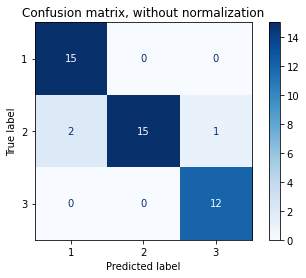

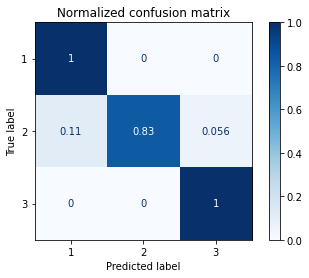

In [21]:
#MLP Multilayer Perception Neural Networks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Load dataset and explore dataset
dataset = pd.read_csv('wine.txt', delimiter = ",")
print(dataset.head())
print("\n")
print("Information about the number of records and columns ",dataset.shape)
print("\n")
print(dataset.isnull().sum())
print("\n")
print(dataset.describe().transpose())
print("\n")

#Select all columns except for Wine type as predictors and Wine type as target variable; axis = 1 refers to columns
X = dataset.drop('Wine',axis=1)
y = dataset['Wine']

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP(Multilayer Perception) model with 4 hidden layers with varying number of perceptrons in each #layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
mlp.fit(X_train,y_train)

#Prediction 
y_pred = mlp.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The #order of the values are
#aligned to the order of the columns
new_input = [[12, 2.2, 2.3, 19, 80, 1.5, 2.0, 0.2, 1.2, 1.2, 2.5, 1.4, 390]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the wine type ", new_y)
print("\n")

#Model Evaluation
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("=======================================================")
print(len(mlp.coefs_))
print(mlp.coefs_)
print("\n")
print("=======================================================")
print(len(mlp.intercepts_))
print(mlp.intercepts_)
print("\n")

# Plot non-normalized confusion matrix
ttitles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp, X_test, y_test,
                                 display_labels=mlp.classes_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

